In [8]:
import pandas as pd, numpy as np, os
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split, GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_hist_gradient_boosting
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,HistGradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# from rgf.sklearn import RGFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [9]:
#import wildfire data set 
df = pd.read_csv("WildFires_DataSet.csv")

A description of the above dataset can be found here: 
https://github.com/ouladsayadyounes/Wildfires

In [10]:
#snapshot of the data
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [11]:
df.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [12]:
#input/features
X = df[["NDVI", "LST", "BURNED_AREA"]]

#output
y = df["CLASS"]

#replace the categories with numerical values
y.replace({"no_fire":0, "fire":1}, inplace=True)

In [13]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [14]:
#Scaler
scaler = StandardScaler()

#### SVM WITH BALANCED CLASS WEIGHT

In [15]:
#### GRID SEARCH ON SVM 
clf = SVC(random_state=5, class_weight='balanced')
# defining parameter range 
param_grid = {'C': np.logspace(1, 2.3, 10),  
              'gamma': np.linspace(0.01,2, 5), 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(clf, param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END ....C=10.0, gamma=0.01, kernel=rbf;, score=0.617 total time=   0.1s
[CV 5/5] END ....C=10.0, gamma=0.01, kernel=rbf;, score=0.703 total time=   0.1s
[CV 2/5] END ....C=10.0, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.1s
[CV 1/5] END ....C=10.0, gamma=0.01, kernel=rbf;, score=0.662 total time=   0.1s
[CV 1/5] END ..C=10.0, gamma=0.5075, kernel=rbf;, score=0.671 total time=   0.1s
[CV 4/5] END ....C=10.0, gamma=0.01, kernel=rbf;, score=0.579 total time=   0.1s
[CV 4/5] END ..C=10.0, gamma=0.5075, kernel=rbf;, score=0.613 total time=   0.1s
[CV 2/5] END ...C=10.0, gamma=1.005, kernel=rbf;, score=0.637 total time=   0.1s
[CV 5/5] END ..C=10.0, gamma=0.5075, kernel=rbf;, score=0.724 total time=   0.1s
[CV 1/5] END ...C=10.0, gamma=1.005, kernel=rbf;, score=0.675 total time=   0.1s
[CV 3/5] END ...C=10.0, gamma=1.005, kernel=rbf;, score=0.646 total time=   0.1s
[CV 4/5] END ...C=10.0, gamma=1.005, kernel=rbf

In [16]:
#### Cross val score
scores_SVM = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation 
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

Accuracy: 0.681 (+/- 0.01)


#### BAGGING CLASSIFER (Built on SVM with Balanced Class Weight)

In [17]:
#grid search for bagging classifier using the SVM classifer obtained above 

bag = BaggingClassifier(grid.best_estimator_, n_jobs=-1, random_state=5)

param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2))}  

grid = GridSearchCV(bag, param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END ...max_features=1, n_estimators=10;, score=0.783 total time=   0.9s
[CV 1/5] END ...max_features=1, n_estimators=10;, score=0.700 total time=   1.4s
[CV 3/5] END ...max_features=1, n_estimators=10;, score=0.700 total time=   1.4s
[CV 2/5] END ...max_features=1, n_estimators=10;, score=0.725 total time=   1.7s
[CV 4/5] END ...max_features=1, n_estimators=20;, score=0.708 total time=   0.9s
[CV 5/5] END ...max_features=1, n_estimators=10;, score=0.732 total time=   2.0s
[CV 3/5] END ...max_features=1, n_estimators=20;, score=0.629 total time=   2.0s
[CV 2/5] END ...max_features=1, n_estimators=20;, score=0.683 total time=   2.7s
[CV 1/5] END ...max_features=1, n_estimators=20;, score=0.679 total time=   3.0s
[CV 5/5] END ...max_features=1, n_estimators=20;, score=0.707 total time=   2.6s
[CV 4/5] END ...max_features=1, n_estimators=30;, score=0.721 total time=   2.6s
[CV 5/5] END ...max_features=1, n_estimators=3

/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       391
           1       0.37      0.43      0.40       123

    accuracy                           0.69       514
   macro avg       0.59      0.60      0.59       514
weighted avg       0.71      0.69      0.70       514

[[301  90]
 [ 70  53]]


In [18]:
#bagging classifier (SVM)
scores_BAG = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_BAG.mean(), scores_BAG.std() * 2))

Accuracy: 0.6883 (+/- 0.0421)


#### EXTRA TREES CLASSIFIER WITH BALANCED CLASS WEIGHT

In [19]:
#### GRID SEARCH for extra trees classifier 

ext = ExtraTreesClassifier(n_jobs=-1, random_state=5, class_weight='balanced')
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2)), 'max_depth' :list(range(1,21, 2))}  
  

grid = GridSearchCV(ext, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END max_depth=1, max_features=1, n_estimators=10;, score=0.562 total time=   0.0s[CV 3/5] END max_depth=1, max_features=1, n_estimators=10;, score=0.512 total time=   0.0s

[CV 2/5] END max_depth=1, max_features=1, n_estimators=10;, score=0.554 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, n_estimators=10;, score=0.483 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=1, n_estimators=10;, score=0.523 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=1, n_estimators=20;, score=0.575 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, n_estimators=20;, score=0.583 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, n_estimators=20;, score=0.508 total time=   0.1s
[CV 4/5] END max_depth=1, max_features=1, n_estimators=20;, score=0.525 total time=   0.1s
[CV 2/5] END max_depth=1, max_features=1, n_estimators=30;, score=0.537 total time=   0.1s
[CV 1/5] END max_depth=1,

In [20]:
#Accuracy for extra trees classifier 
scores_EXT = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation 
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_EXT.mean(), scores_EXT.std() * 2))

Accuracy: 0.8208 (+/- 0.0301)


#### ADABOOST CLASSIFIER WITH BALANCED CLASS WEIGHT 

In [21]:
#### GRID SEARCH for Ada bosst classifier 

adb = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'), random_state=5)
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]}  
  

grid = GridSearchCV(adb, param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

{'learning_rate': 1, 'n_estimators': 100}
AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   learning_rate=1, n_estimators=100, random_state=5)
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       391
           1       0.39      0.57      0.46       123

    accuracy                           0.68       514
   macro avg       0.61      0.64      0.62       514
weighted avg       0.73      0.68      0.70       514

[[280 111]
 [ 53  70]]


In [22]:
#Adaboost classifier 
scores_ADB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_ADB.mean(), scores_ADB.std() * 2))

Accuracy: 0.6894 (+/- 0.0485)


#### GRADIENT BOOSTING

In [23]:
#Gradient Boosting 
gb_clf2 = GradientBoostingClassifier( subsample=0.289, random_state=5)
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2)), 'max_depth' :list(range(1,21, 2))}  
  

grid = GridSearchCV(gb_clf2, param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

{'max_depth': 13, 'max_features': 3, 'n_estimators': 100}
GradientBoostingClassifier(max_depth=13, max_features=3, random_state=5,
                           subsample=0.289)
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       391
           1       0.68      0.41      0.52       123

    accuracy                           0.81       514
   macro avg       0.76      0.68      0.70       514
weighted avg       0.80      0.81      0.80       514

[[367  24]
 [ 72  51]]


In [24]:
#Gradient boosting classfier 
scores_GB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_GB.mean(), scores_GB.std() * 2))

Accuracy: 0.8330 (+/- 0.0219)


#### XGBOOST

In [25]:
xg_clf = xgb.XGBClassifier(random_state=5)

param_grid = {'n_estimators': list(range(0, 110, 10))[1:] ,  'max_features': list (range(1,21, 2)), 'max_depth':list(range(1,21, 2))}  
  

grid = GridSearchCV(xg_clf , param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.
[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.


[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.
[18:36:48] WARNING: /var/folders/sy/f16zz6x50xz3113

In [26]:
#Extreme Gradient Boosting classifier 
scores_XGB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_XGB.mean(), scores_XGB.std() * 2))

[18:37:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:37:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:37:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:38:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[18:38:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Accuracy: 0.8184 (+/- 0.0436)


#### RANDOM FOREST

In [27]:
#Random Forest

rf_clf2 = RandomForestClassifier(random_state=5)


param_grid = {'n_estimators': list(range(0, 110, 10))[1:], 'max_features': list (range(1,21, 2)), 'max_depth' :list(range(0,21, 2))[1:]}  
  

grid = GridSearchCV(rf_clf2 , param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

{'max_depth': 16, 'max_features': 1, 'n_estimators': 40}
RandomForestClassifier(max_depth=16, max_features=1, n_estimators=40,
                       random_state=5)
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       391
           1       0.69      0.40      0.51       123

    accuracy                           0.81       514
   macro avg       0.76      0.67      0.70       514
weighted avg       0.80      0.81      0.79       514

[[369  22]
 [ 74  49]]


In [28]:
#Random Forest classfier 
scores_RF = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_RF.mean(), scores_RF.std() * 2))

Accuracy: 0.8476 (+/- 0.0244)


#### SKLEARN NEURAL NET

In [29]:
ml_clf2 = MLPClassifier(hidden_layer_sizes=30
                        , activation='relu', solver='adam', alpha=1, random_state=5,)
param_grid = {'hidden_layer_sizes': list(range(0, 51, 5))[1:]}  
  

grid = GridSearchCV(ml_clf2 , param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

{'hidden_layer_sizes': 50}
MLPClassifier(alpha=1, hidden_layer_sizes=50, random_state=5)
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       391
           1       0.53      0.07      0.13       123

    accuracy                           0.76       514
   macro avg       0.65      0.53      0.50       514
weighted avg       0.71      0.76      0.69       514

[[383   8]
 [114   9]]


In [30]:
#MLP Classifier
scores_NN = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NN.mean(), scores_NN.std() * 2))

Accuracy: 0.7828 (+/- 0.0150)


#### NEAREST NEIGHBOUR

In [31]:
neigh = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
param_grid = {'n_neighbors': list(range(1, 15, 2))}  

grid = GridSearchCV(neigh , param_grid, refit = True, cv = 5, verbose = 0,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
neigh.fit(scaler.fit_transform(X_train), y_train)
predictions = neigh.predict(scaler.transform(X_test))

print(classification_report(y_test, predictions)) 
print(accuracy_score(y_test, predictions))

{'n_neighbors': 11}
KNeighborsClassifier(algorithm='brute', n_neighbors=11)
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       391
           1       0.56      0.24      0.33       123

    accuracy                           0.77       514
   macro avg       0.68      0.59      0.60       514
weighted avg       0.74      0.77      0.74       514

[[368  23]
 [ 94  29]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       391
           1       0.47      0.38      0.42       123

    accuracy                           0.75       514
   macro avg       0.64      0.62      0.63       514
weighted avg       0.73      0.75      0.74       514

0.7490272373540856


In [32]:
#Nearest NEighbour Classifier
scores_NNeigh = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NNeigh.mean(), scores_NNeigh.std() * 2))

Accuracy: 0.7846 (+/- 0.0321)


#### GAUSSIAN NAIVE BAYES

In [33]:
#NAive bayes classfier
gnb = GaussianNB()
scores_NB = cross_val_score(gnb, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NB.mean(), scores_NB.std() * 2))

Accuracy: 0.7776 (+/- 0.0128)


#### STOCHASTIC GRADIENT WITH BALANCED CLASS WEIGHT

In [34]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber',
    'squared_hinge', 'perceptron', 'squared_loss',
    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
sgc = SGDClassifier(random_state=5, class_weight='balanced')
grid = GridSearchCV(sgc , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
neigh.fit(scaler.fit_transform(X_train), y_train)
predictions = neigh.predict(scaler.transform(X_test))
print(classification_report(y_test, predictions)) 


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........................loss=hinge;, score=0.700 total time=   0.0s
[CV 2/5] END ........................loss=hinge;, score=0.662 total time=   0.0s
[CV 3/5] END ........................loss=hinge;, score=0.583 total time=   0.0s
[CV 4/5] END ........................loss=hinge;, score=0.521 total time=   0.0s
[CV 5/5] END ........................loss=hinge;, score=0.665 total time=   0.0s
[CV 2/5] END ..........................loss=log;, score=0.550 total time=   0.0s
[CV 3/5] END ..........................loss=log;, score=0.529 total time=   0.0s
[CV 1/5] END ..........................loss=log;, score=0.617 total time=   0.0s
[CV 4/5] END ..........................loss=log;, score=0.588 total time=   0.0s
[CV 3/5] END ...............loss=modified_huber;, score=0.588 total time=   0.0s
[CV 2/5] END ...............loss=modified_huber;, score=0.796 total time=   0.0s
[CV 4/5] END ...............loss=modified_huber;,

/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/oowola01/opt/anaconda3/envs/mlwork/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be remo

In [35]:
#Stochastic Gradient boosting classifier 
scores_SGD = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_SGD.mean(), scores_SGD.std() * 2))

Accuracy: 0.5955 (+/- 0.3730)


#### PLOT BAR CHART

#### Description 
SVM = Support Vector Machine with Balanced Class Weight <br>
BAG_SVM = bagging Classifiers (of SVMs with Balanced Class Weight)<br>
EXT = Extra Trees Classifier with Balanced Class Weight<br>
ADB = Adabost Classifier with Balanced Class Weight <br>
GB = Gradient Boosting <br>
XGB = Extreme Gradient Boosting <br>
RF = Random Forest <br>
NN = Neural Network <br>
NNEIGH = Nearest Neighbour <br>
SGD = Stochastic Gradient Descent with Balanced Class Weight 

In [36]:
#Creating plot elelments
models = ['SVM with bal', 'BAG_SVM wit bal', 'EXT with bal', 'ADB with bal', 'GB', 'XGB', 'RF', 'NN', 'NNEIGH', 'NB', 'SGD with bal']
x_pos = np.arange(len(models))
mean = [scores_SVM.mean(), scores_BAG.mean(), scores_EXT.mean(), scores_ADB.mean(), scores_GB.mean(), scores_XGB.mean(), scores_RF.mean(),scores_NN.mean(), scores_NNeigh.mean(), scores_NB.mean(), scores_SGD.mean() ]
std = [scores_SVM.std(), scores_BAG.std(), scores_EXT.std(), scores_ADB.std(), scores_GB.std(), scores_XGB.std(), scores_RF.std(),scores_NN.std(), scores_NNeigh.std(), scores_NB.std(), scores_SGD.std() ]

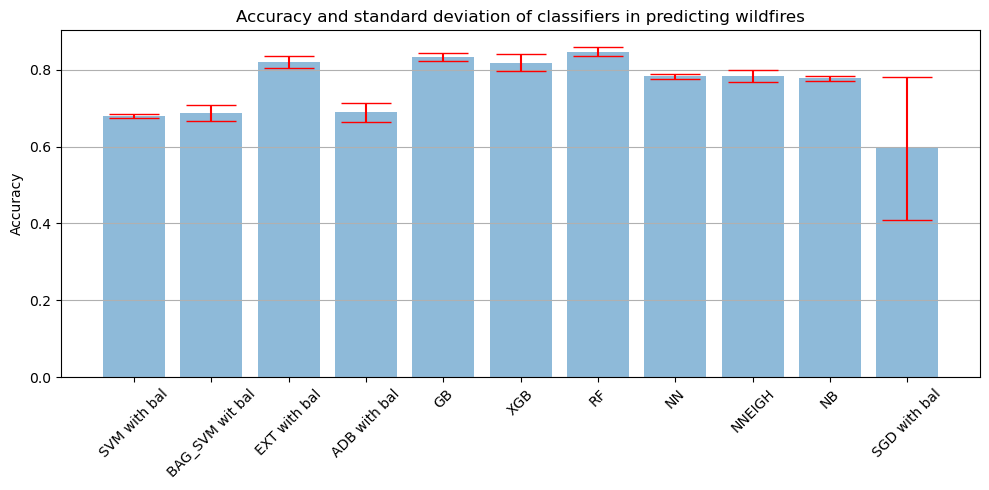

In [37]:
#plot with class weight balance 
fig, ax = plt.subplots(figsize =(10,5))
ax.bar(x_pos, mean, yerr=std, align='center', alpha=0.5, ecolor='red', capsize=18)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45)
ax.set_title('Accuracy and standard deviation of classifiers in predicting wildfires')
ax.yaxis.grid(True)
# Save the figure and show
plt.tight_layout()
plt.savefig("accuracy_1")
plt.show()

More details on the result analysis can be found in my blogpost: https://sites.tufts.edu/olukunleowolabi/2020/03/15/a-comprehensive-classification-model-for-predicting-wildfires-with-uncertainty/